__SVM__

In [56]:
# Подключение библиотек
import matplotlib.pyplot as plt
from matplotlib import gridspec 
import seaborn as sns 
import pandas as pd 
from tqdm.notebook import tqdm
from scipy.special import softmax 
from scipy.spatial.distance import cdist 
import numpy as np 
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [57]:
#Генерируем выборку
X, Y = make_classification(n_samples=150, n_features=2, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           random_state=40)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50, random_state=0)

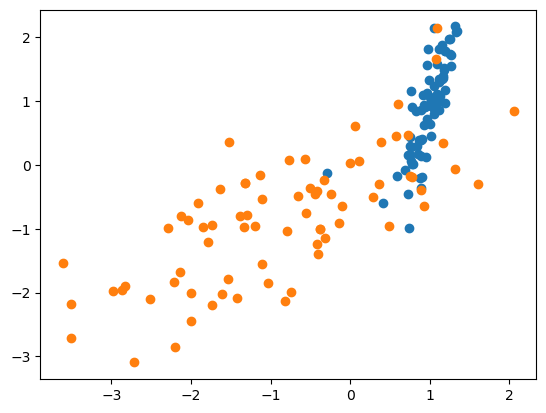

In [58]:
for k in np.unique(Y):
    pit.plot(X[Y==k, 0], X[Y==k, 1], 'o')
plt.show()    

In [59]:
#Обучаем линейную модель
model = SVC(kernel='linear')
_ = model.fit (X_train, Y_train)

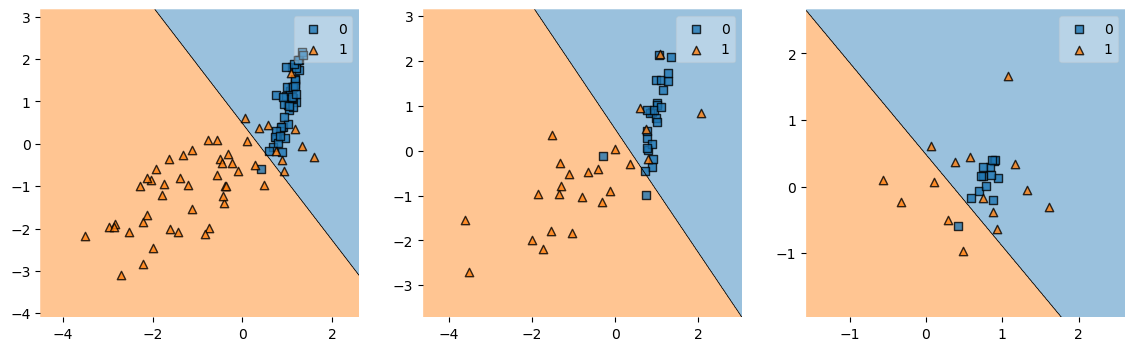

In [60]:
#Графически отображаем результаты
fig, gs = pit.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)
ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
plot_decision_regions(X_train, Y_train, model, ax=ax[0]) 
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

__Раздичные ядра для SVM__

In [61]:
# Геренация новой выборки
np.random.seed(0)
m = 150 
n = 2
X = 10*np.random.randn(m, n)
Y = np.array((X[:,0]**2+X[:,1]**2+50*np.random.randn(m))<100, dtype=np.int64)
X_train, X_test, Y_train, Ytest = train_test_split(X, Y, test_size=50, random_state=0)

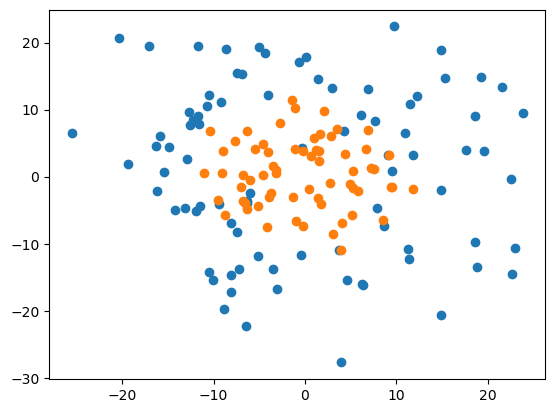

In [62]:
for k in np.unique(Y):
    pit.plot(X[Y==k, 0], X[Y==k, 1], 'o')
plt.show()    

In [63]:
#Обучение полиномиальной модели

model = SVC(kernel='poly')
_ = model.fit (X_train, Y_train)

#сигмоидная модель  model = SVC(kernel='sigmoid')

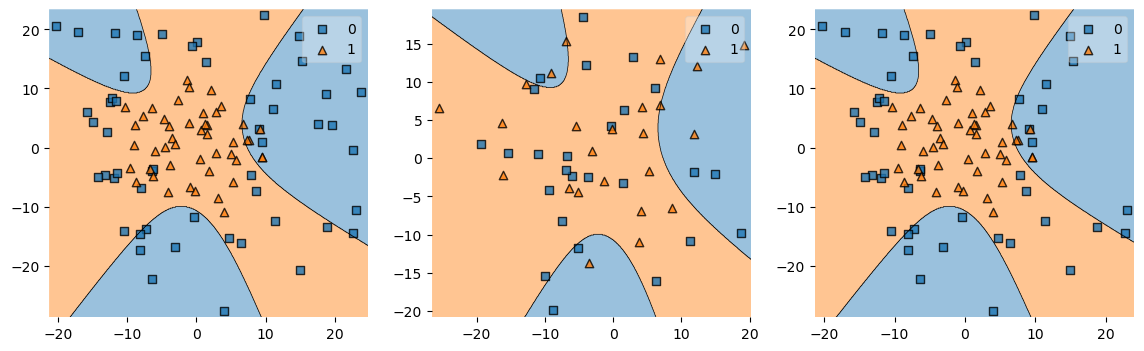

In [64]:
#Построение
fig, gs = pit.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)
ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
plot_decision_regions(X_train, Y_train, model, ax=ax[0]) 
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

__Гауссово ядро с радиальной базовой функцией (RBF):  $ K(x_i,x_j)=exp(γ||x_i−x_j||^2)$__


In [65]:
#Обучаем линейную модель
model = SVC(kernel='rbf')
_ = model.fit (X_train, Y_train)

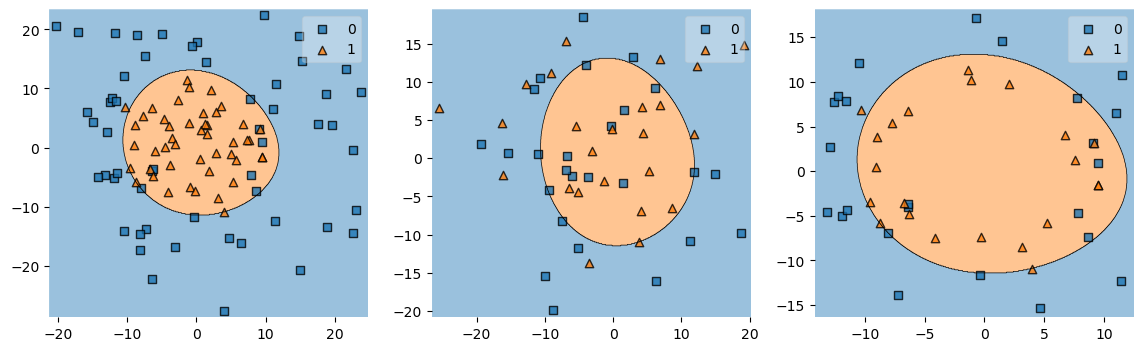

In [66]:
#Построение
fig, gs = pit.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)
ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
plot_decision_regions(X_train, Y_train, model, ax=ax[0]) 
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

__SVM Regression__

In [67]:
np.random.seed(0)
l = 150
# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4*np.random.randn(l)
# Генерация признаков. Два признака х - линейные и np.sin(x) - через синус. 
X = np.array([x, np.sin(x)]).T
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50, random_state=0)


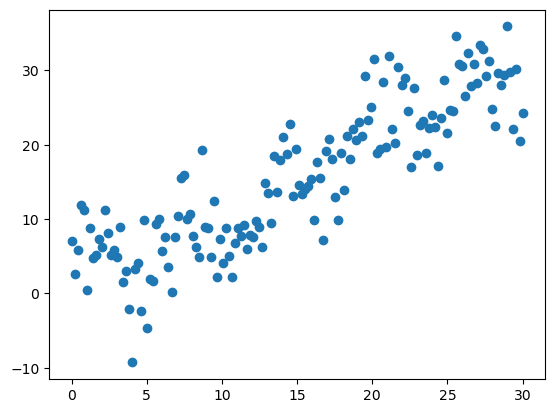

In [68]:
plt.plot(X[:, 0], Y, 'o')
plt.show()

In [69]:
#Ядро RBF
model = SVR(kernel='rbf')
_ = model.fit(X_train, Y_train)

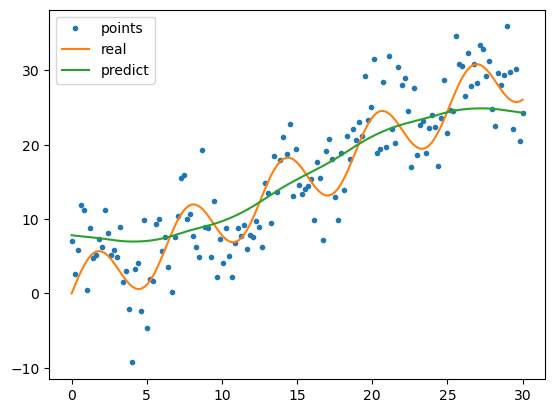

In [50]:
plt.plot(x, Y,'.', label='points')
plt.plot(x, Y_without_noise, label='real') 
plt.plot(x, model.predict(X), label='predict')
pit.legend(loc='best') 
pit.show()

In [70]:
#Ядро линейное
model = SVR(kernel='linear')
_ = model.fit(X_train, Y_train)

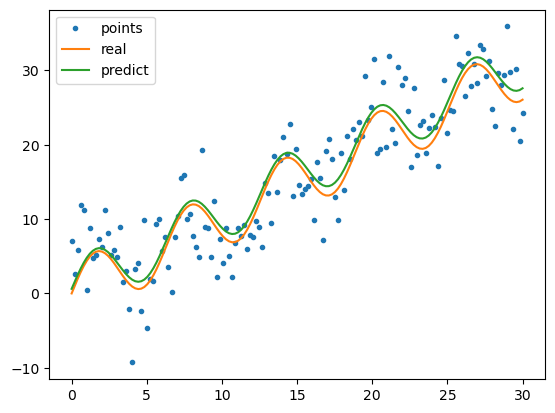

In [71]:
plt.plot(x, Y,'.', label='points')
plt.plot(x, Y_without_noise, label='real') 
plt.plot(x, model.predict(X), label='predict')
pit.legend(loc='best') 
pit.show()

In [79]:
np.random.seed(0)
l = 150
# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4*np.random.randn(l)
# Генерация признаков
X = np.array( [x]).T
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50, random_state=0)


In [80]:
# Организация собственного ядра. Это то-же самое, что и X = np.array([x, np.sin(x)]).T используемое ранее.
def kernel(X1, X2):
    return np.sin(X1)@np.sin(X2).T + X1@X2.T

In [81]:
#Ядро линейное
model = SVR(kernel=kernel)
_ = model.fit(X_train, Y_train)

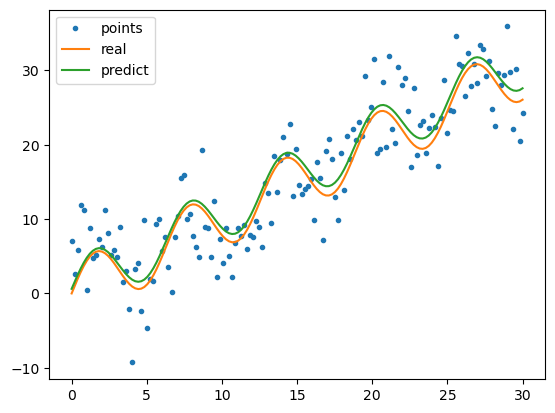

In [82]:
plt.plot(x, Y,'.', label='points')
plt.plot(x, Y_without_noise, label='real') 
plt.plot(x, model.predict(X), label='predict')
pit.legend(loc='best') 
pit.show()

__SVM Продолжение__

In [83]:
X, Y = make_classification(n_samples=2500, n_features=10, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0, n_clusters_per_class=1, 
                           random_state=10)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=500, 
                                                    random_state=0)

In [84]:
# RBF ядро
def kernel(X1, X2):
    return np.exp(-0.05*cdist(X1, X2)**2)

In [86]:
model = SVC(kernel=kernel)
_ = model.fit(X_train, Y_train) 
print('Accuracy =', model.score(X_test, Y_test))

Accuracy = 0.916


__Нормализация__

In [90]:
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [91]:
model = SVC(kernel=kernel)
_ = model.fit(X_train, Y_train) 
print('Accuracy =', model.score(X_test, Y_test))

Accuracy = 0.912


____Задание____ 

In [ ]:
1. Классификация
Датасет сформирован следующей командой:
X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2)
Подобрать тип ядра и гиперпараметры для данной выборки. Произвести визуальное сравнение разных ядер и разных гиперпараметров. Сравнить точность для разных случаев.

2. Регрессия
Использовать датасет по гиперспектру кукурузы. 
Подобрать тип ядра и гиперпараметры для данной выборки. Произвести визуальное сравнение разных ядер и разных гиперпараметров. Сравнить точность для разных случаев.

3. Использовать любой из датасетов и любых два метода классификации или регрессии, изученные на предыдущих занятиях. Произвести сравнение 
работы этих методов и метода SVM. Кроме точности использовать и другие метрики качества алгоритма.
